In [150]:
# Libraries
import pandas as pd
import numpy as np

# Wrangling
import acquire
import prepare

# Exploration/Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
import explore
from IPython.core import display as ICD

# Custom Modules
import util
from env import get_db_url

# Custom notebook settings for max rows and columns
# pd.set_option('display.max_rows', 2000)
# pd.set_option('display.max_columns', None)

In [2]:
df = acquire.get_log_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  900223 non-null  int64  
 1   date        900223 non-null  object 
 2   time        900223 non-null  object 
 3   path        900222 non-null  object 
 4   user_id     900223 non-null  int64  
 5   cohort_id   847330 non-null  float64
 6   ip          900223 non-null  object 
 7   id          847330 non-null  float64
 8   name        847330 non-null  object 
 9   slack       847330 non-null  object 
 10  start_date  847330 non-null  object 
 11  end_date    847330 non-null  object 
 12  created_at  847330 non-null  object 
 13  updated_at  847330 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  847330 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 109.9+ MB


In [4]:
df.head()

,Unnamed: 0,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0
4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2.0


In [5]:
util.metrics(df)

There are 900223 rows and 16 columns in this dataframe.
Plus the following nulls:
Unnamed: 0         0
date               0
time               0
path               1
user_id            0
cohort_id      52893
ip                 0
id             52893
name           52893
slack          52893
start_date     52893
end_date       52893
created_at     52893
updated_at     52893
deleted_at    900223
program_id     52893
dtype: int64
Unnamed: 0      int64
date           object
time           object
path           object
user_id         int64
cohort_id     float64
ip             object
id            float64
name           object
slack          object
start_date     object
end_date       object
created_at     object
updated_at     object
deleted_at    float64
program_id    float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,900223.0,450111.000000,259872.140027,0.0,225055.5,450111.0,675166.5,900222.0
user_id,900223.0,458.825707,249.296767,1.0,269.0,475.0,660.0,981.0
cohort_id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
id,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0
deleted_at,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
program_id,847330.0,2.086004,0.388231,1.0,2.0,2.0,2.0,4.0


In [6]:
counts = util.get_numbers(df)

Unnamed: 0
0         1
600153    1
600142    1
600143    1
600144    1
         ..
300078    1
300079    1
300080    1
300081    1
900222    1
Name: Unnamed: 0, Length: 900223, dtype: int64
-----------------
date
2021-03-19    3104
2021-04-12    2446
2021-03-25    2369
2020-09-08    2304
2021-03-16    2298
              ... 
2018-12-29      32
2018-12-22      30
2018-12-30      21
2019-07-04      16
2018-12-23      10
Name: date, Length: 1182, dtype: int64
-----------------
time
09:03:00    81
09:01:59    79
09:02:45    75
09:02:16    75
09:05:45    74
            ..
04:58:23     1
04:58:29     1
04:58:30     1
04:58:31     1
07:28:59     1
Name: time, Length: 73167, dtype: int64
-----------------
path
/                                                               50313
search/search_index.json                                        19519
javascript-i                                                    18983
toc                                                             18297
java-iii

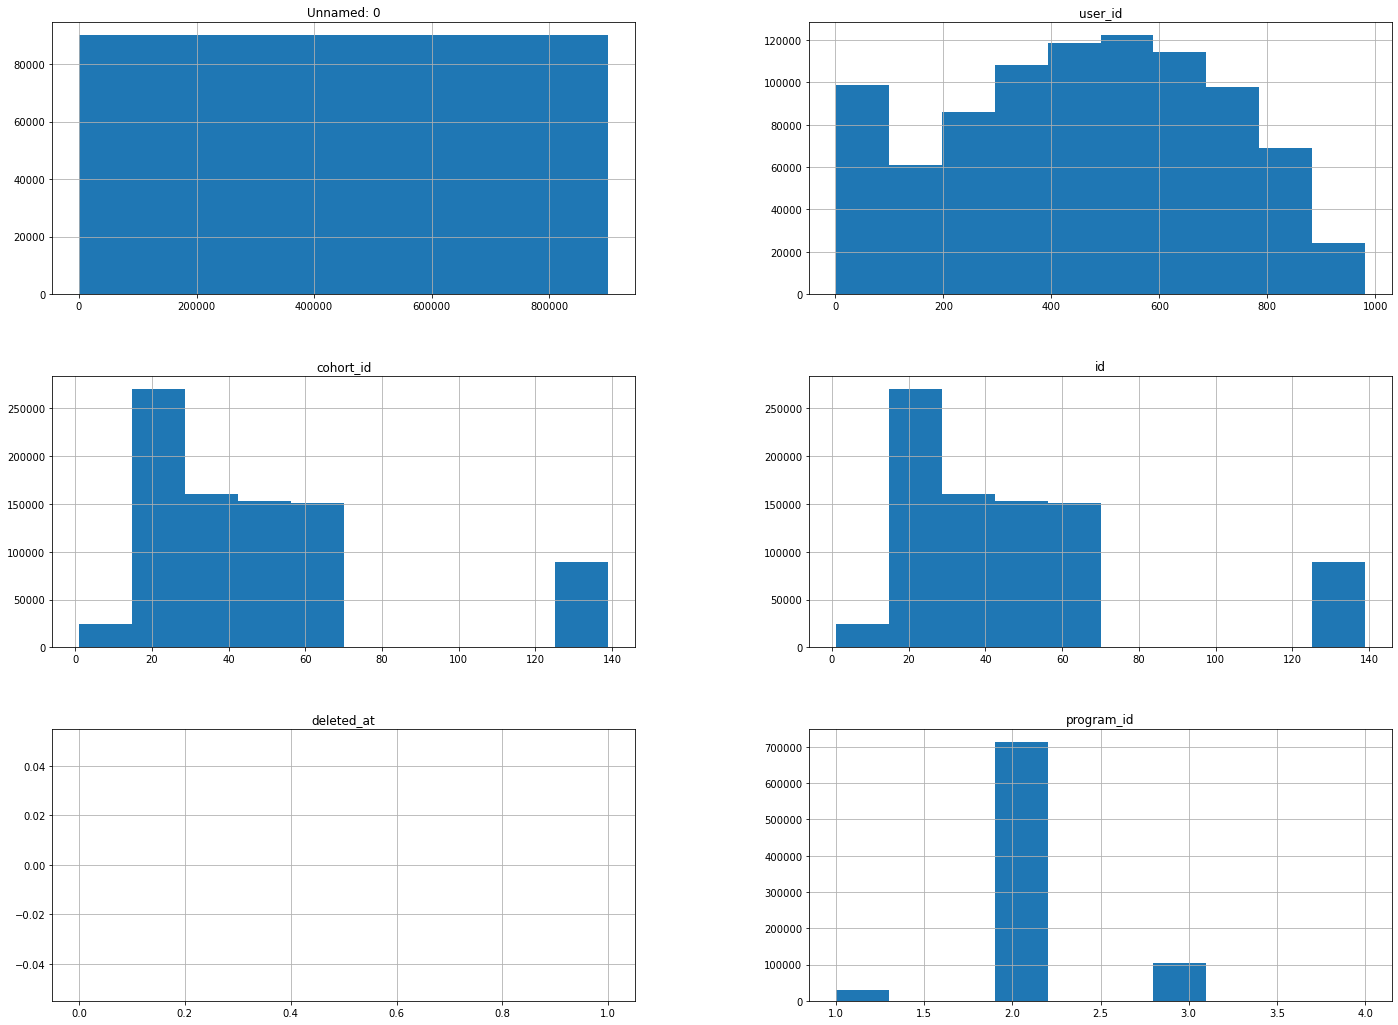

In [7]:
# Shows histograms for numerical columns in df
df.hist(figsize=(24, 18))
plt.show()

In [8]:
ds_names = ['Ada', 'Bayes', 'Curie', 'Darden', 'Easley', 'Florence', '']

In [9]:
ds_alumni = df.loc[df['name'].isin(ds_names)]

In [10]:
ds_alumni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103412 entries, 326053 to 900202
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  103412 non-null  int64  
 1   date        103412 non-null  object 
 2   time        103412 non-null  object 
 3   path        103411 non-null  object 
 4   user_id     103412 non-null  int64  
 5   cohort_id   103412 non-null  float64
 6   ip          103412 non-null  object 
 7   id          103412 non-null  float64
 8   name        103412 non-null  object 
 9   slack       103412 non-null  object 
 10  start_date  103412 non-null  object 
 11  end_date    103412 non-null  object 
 12  created_at  103412 non-null  object 
 13  updated_at  103412 non-null  object 
 14  deleted_at  0 non-null       float64
 15  program_id  103412 non-null  float64
dtypes: float64(4), int64(2), object(10)
memory usage: 13.4+ MB


In [11]:
# convert date, time, start_date, end_date, created_at, and	updated_at, to datetime dtype
# convert all ids to objects since they're used as ids not computational numbers
# drop 'cohort_id' or 'id' since they're the same
# drop 'slack', since 'name' has basically the same info plus more
# drop deleted_at since it's nulls
# can set a multi-index using 'date' and 'time' as the timestamp
# figure out how to sus out the ds students from the 52893 entries with some column nulls
# at least 103412 ds cohort entries
# 1 value in path is a null

# Preparation
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [12]:
q2_df = prepare.prepare_logs()

In [13]:
q2_df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


In [14]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  int64  
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   created_at  847330 non-null  object 
 8   updated_at  847330 non-null  object 
 9   program_id  847330 non-null  object 
 10  date_time   900223 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 75.5+ MB


In [15]:
q2_df['path'].unique()

array(['/', 'java-ii', 'java-ii/object-oriented-programming', ...,
       'florence-python-assessment.html', 'javascript-i/dom',
       'appendix/professional-development/post-interview-review-form'],
      dtype=object)

In [16]:
q2_df = prepare.q2_df_prep(q2_df)

In [17]:
q2_df.head()

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


# Exploration
- 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [18]:
q2_df['cohorts'].value_counts()

ceres         40730
zion          38096
jupiter       37109
fortuna       36902
voyageurs     35636
ganymede      33844
apex          33568
deimos        32888
darden        32015
teddy         30926
hyperion      29855
betelgeuse    29356
ulysses       28534
europa        28033
xanadu        27749
bayes         26538
wrangell      25586
andromeda     25359
kalypso       23691
curie         21581
yosemite      20743
bash          17713
luna          16623
marco         16397
easley        14715
lassen         9587
arches         8890
florence       8562
sequoia        7444
neptune        7276
olympic        4954
kings          2845
pinnacles      2158
hampton        1712
oberon         1672
quincy         1237
niagara         755
mammoth         691
glacier         598
joshua          302
ike             253
badlands         93
franklin         72
apollo            5
denali            4
everglades        1
Name: cohorts, dtype: int64

Based on the question should I scale my data to try to equally represent each cohort?

Should I scale it based on the length of their program?

Should it be scaled based on number of students per cohort?

Should I exclude lessons accessed outside of each cohorts class dates?

Should I exclude cohorts that didn't finish their program before the last recorded date?

If so, how do I deal with cohorts with less than 100 entries? Are they considered anomalies as well?

In [19]:
def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('probability'),
        left_index=True,
        right_index=True,
    )

In [20]:
ip_df = value_counts_and_frequencies(q2_df.ip)
ip_df.head()

,count,probability
97.105.19.58,245055,0.321048
97.105.19.61,60530,0.079301
192.171.117.210,8911,0.011674
67.11.50.23,4181,0.005478
172.124.67.93,3511,0.004600


<AxesSubplot:>

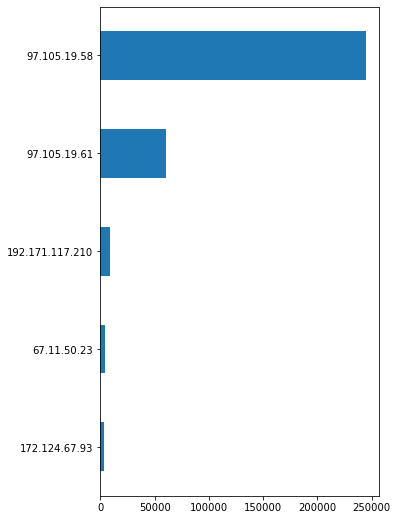

In [21]:
ip_df['count'].sort_values().tail(5).plot.barh(figsize=(5, 9))

IP Address: 97.105.19.61
ASN: 11427
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78205
ISP: Codeup LLC
Time Zone: -05:00

IP Address: 97.105.19.58
ASN: 11427
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78205
ISP: Codeup LLC
Time Zone: -05:00

IP Address: 192.171.117.210
ASN: 16887
City: San Antonio
State/Region: Texas
Country: US
Postal Code: 78216
ISP: Aethernet LLC
Time Zone: -05:00

In [22]:
paths = q2_df['path'].value_counts()
paths

/                             39514
toc                           16680
javascript-i                  16386
search/search_index.json      16185
html-css                      11843
                              ...  
About_NLP                         1
8.0_Intro_Module                  1
introduction-to-matplotlib        1
2.0_Intro_Stats                   1
13.5_Tableau                      1
Name: path, Length: 1844, dtype: int64

In [23]:
paths_df = paths.to_frame()

In [24]:
paths_df

,path
/,39514
toc,16680
javascript-i,16386
search/search_index.json,16185
html-css,11843
...,...
About_NLP,1
8.0_Intro_Module,1
introduction-to-matplotlib,1
2.0_Intro_Stats,1


In [26]:
q2_df

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...
900210,jquery/personal-site,869,135.0,136.50.98.51,marco,2021-01-25,2021-07-19,2021-01-20 21:31:11,2021-01-20 21:31:11,full_stack_java,2021-04-21 16:36:09
900211,html-css/css-ii/bootstrap-grid-system,948,138.0,104.48.214.211,neptune,2021-03-15,2021-09-03,2021-03-15 19:57:09,2021-03-15 19:57:09,full_stack_java,2021-04-21 16:36:34
900212,java-iii,834,134.0,67.11.50.23,luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2021-04-21 16:37:48
900213,java-iii/servlets,834,134.0,67.11.50.23,luna,2020-12-07,2021-06-08,2020-12-07 16:58:43,2020-12-07 16:58:43,full_stack_java,2021-04-21 16:38:14


In [27]:
# convert columns with dates to datetime
dates = ['start_date', 'end_date', 'created_at', 'updated_at']
for col in dates:
    q2_df[col] = pd.to_datetime(df[col])

In [28]:
q2_df = q2_df[q2_df['end_date'] <= q2_df['created_at']]

In [29]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11628 entries, 0 to 832183
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        11628 non-null  object        
 1   user_id     11628 non-null  int64         
 2   cohort_id   11628 non-null  float64       
 3   ip          11628 non-null  object        
 4   cohorts     11628 non-null  object        
 5   start_date  11628 non-null  datetime64[ns]
 6   end_date    11628 non-null  datetime64[ns]
 7   created_at  11628 non-null  datetime64[ns]
 8   updated_at  11628 non-null  datetime64[ns]
 9   programs    11628 non-null  object        
 10  date_time   11628 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [31]:
cohort = ['ceres', 'zion', 'jupiter', 'voyageurs', 'ganymede', 'apex', 'deimos', 'darden',
        'teddy', 'hyperion', 'betelgeuse', 'ulysses', 'europa', 'xanadu', 'bayes', 'wrangell',
        'andromeda', 'kalypso', 'curie', 'yosemite', 'bash', 'luna', 'marco', 'easley', 'lassen',
        'arches', 'florence', 'sequoia', 'neptune', 'olympic', 'kings', 'pinnacles', 'hampton',
        'oberon', 'quincy', 'niagara', 'mammoth', 'glacier', 'joshua', 'ike', 'badlands', 
        'franklin', 'apollo', 'denali', 'everglades']

In [148]:
def split_cohorts(df):
    cohort = ['ceres', 'zion', 'jupiter', 'voyageurs', 'ganymede', 'apex', 'deimos', 'darden',
        'teddy', 'hyperion', 'betelgeuse', 'ulysses', 'europa', 'xanadu', 'bayes', 'wrangell',
        'andromeda', 'kalypso', 'curie', 'yosemite', 'bash', 'luna', 'marco', 'easley', 'lassen',
        'arches', 'florence', 'sequoia', 'neptune', 'olympic', 'kings', 'pinnacles', 'hampton',
        'oberon', 'quincy', 'niagara', 'mammoth', 'glacier', 'joshua', 'ike', 'badlands', 
        'franklin', 'apollo', 'denali', 'everglades']
    for name in cohort:
        df[df['cohorts']==name]
    return df

In [ ]:
dfs = {cohorts:grp.drop('cohorts', axis=1) 
       for cohorts, grp in q2_df.reset_index().groupby('cohorts')}

for cohorts, grp in dfs.items():
    print('\033[1m' + cohorts.upper() + '\033[0m')
    ICD.display(grp)

In [149]:
split_cohorts(q2_df)

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
30,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47
...,...,...,...,...,...,...,...,...,...,...,...
816534,/,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:56:56
816538,/,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:58:43
816549,content/html-css,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:59:58
816550,content/html-css/gitbook/images/favicon.ico,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:59:59


Divied by programs

In [34]:
q2_df['cohorts'].value_counts()

arches        8890
hampton       1712
glacier        598
ike            253
badlands        93
franklin        72
apollo           5
denali           4
everglades       1
Name: cohorts, dtype: int64

In [86]:
cohort_lessons = pd.crosstab(q2_df.cohorts, q2_df.path)
cohort_lessons

path,/,0_Classification_Algorithms,1-fundamentals/1.1-intro-to-data-science,1-fundamentals/AI-ML-DL-timeline.jpg,1-fundamentals/modern-data-scientist.jpg,11._DistributedML,12.01_SocialNetworkAnalysis,2.00.02_Navigating_Excel,2.00.05_Charts_PivotTables_Sparklines,2.02.00_Inferential_Stats,...,spring/setup,student,student/create,students,students/468/notes,students/units/75/sub_units/268,teams/13,toc,uploads/5762c2946250b.jpg,uploads/58a217a705bde.jpg
cohorts,,,,,,,,,,,,,,,,,,,,,
apollo,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
arches,626,1,0,0,0,0,0,0,0,0,...,73,0,0,1,0,1,0,66,2,0
badlands,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
denali,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
everglades,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
franklin,4,0,0,0,0,1,1,1,1,1,...,2,0,0,0,0,0,0,0,0,0
glacier,51,0,7,7,7,0,0,0,0,0,...,2,0,0,0,0,0,0,13,0,0
hampton,210,1,0,0,0,0,0,0,0,0,...,13,1,1,0,1,0,1,5,5,1
ike,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,0


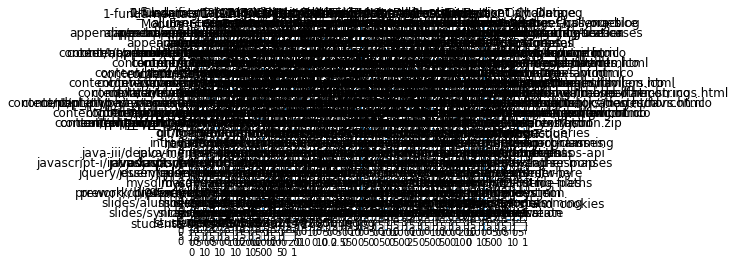

In [92]:
cohort_lessons.hist()
plt.show()

In [93]:
ceres = q2_df[q2_df['cohorts']=='ceres']
ceres

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [94]:
zion = q2_df[q2_df['cohorts']=='zion']
zion

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [95]:
jupiter = q2_df[q2_df['cohorts']=='jupiter']
jupiter

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [96]:
fortuna = q2_df[q2_df['cohorts']=='fortuna']
fortuna

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [97]:
voyageurs = q2_df[q2_df['cohorts']=='voyageurs']
voyageurs

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [98]:
ganymede = q2_df[q2_df['cohorts']=='ganymede']
ganymede

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [99]:
deimos = q2_df[q2_df['cohorts']=='deimos']
deimos

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [100]:
darden = q2_df[q2_df['cohorts']=='darden']
darden

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [101]:
teddy = q2_df[q2_df['cohorts']=='teddy']
teddy

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [102]:
hyperion = q2_df[q2_df['cohorts']=='hyperion']
hyperion

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [103]:
betelgeuse = q2_df[q2_df['cohorts']=='betelgeuse']
betelgeuse

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [104]:
ulysses = q2_df[q2_df['cohorts']=='ulysses']
ulysses

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [105]:
europa = q2_df[q2_df['cohorts']=='europa']
europa

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [106]:
xanadu = q2_df[q2_df['cohorts']=='xanadu']
xanadu

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [107]:
bayes = q2_df[q2_df['cohorts']=='bayes']
bayes

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [108]:
wrangell = q2_df[q2_df['cohorts']=='wrangell']
wrangell

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [109]:
andromeda = q2_df[q2_df['cohorts']=='andromeda']
andromeda

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [110]:
kalypso = q2_df[q2_df['cohorts']=='kalypso']
kalypso

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [111]:
curie = q2_df[q2_df['cohorts']=='curie']
curie

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [112]:
yosemite = q2_df[q2_df['cohorts']=='yosemite']
yosemite

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [113]:
bash = q2_df[q2_df['cohorts']=='bash']
bash

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [114]:
luna = q2_df[q2_df['cohorts']=='luna']
luna

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [115]:
marco = q2_df[q2_df['cohorts']=='marco']
marco

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [116]:
easley = q2_df[q2_df['cohorts']=='easley']
easley

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [117]:
lassen = q2_df[q2_df['cohorts']=='lassen']
lassen

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [118]:
arches = q2_df[q2_df['cohorts']=='arches']
arches

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
30,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47
31,javascript-i,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:51
33,javascript-i/functions,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:15:02
134,appendix/further-reading/javascript/hoisting.html,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 11:46:29
136,appendix,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 11:46:39
...,...,...,...,...,...,...,...,...,...,...,...
812841,/,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-05 16:12:00
816534,/,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:56:56
816538,/,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:58:43
816549,content/html-css,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:59:58


In [119]:
florence = q2_df[q2_df['cohorts']=='florence']
florence

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [120]:
sequoia = q2_df[q2_df['cohorts']=='sequoia']
sequoia

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [121]:
neptune = q2_df[q2_df['cohorts']=='neptune']
neptune

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [122]:
olympic = q2_df[q2_df['cohorts']=='olympic']
olympic

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [123]:
kings = q2_df[q2_df['cohorts']=='kings']
kings

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [124]:
pinnacles = q2_df[q2_df['cohorts']=='pinnacles']
pinnacles

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [125]:
hampton = q2_df[q2_df['cohorts']=='hampton']
hampton

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
58,javascript-i/functions,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:40:15
...,...,...,...,...,...,...,...,...,...,...,...
521967,content/javascript/arrays/gitbook/images/favic...,646,8.0,173.174.197.146,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-04-23 10:18:07
521969,content/javascript/arrays/iterating.html,646,8.0,173.174.197.146,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-04-23 10:18:47
521974,content/javascript/functions.html,646,8.0,173.174.197.146,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-04-23 10:19:24
525653,content/javascript/loops.html,646,8.0,173.174.197.146,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-04-28 10:58:31


In [126]:
oberon = q2_df[q2_df['cohorts']=='oberon']
oberon

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [127]:
quincy = q2_df[q2_df['cohorts']=='quincy']
quincy

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [128]:
niagara = q2_df[q2_df['cohorts']=='niagara']
niagara

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [129]:
mammoth = q2_df[q2_df['cohorts']=='mammoth']
mammoth

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [130]:
glacier = q2_df[q2_df['cohorts']=='glacier']
glacier

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
3169,/,77,7.0,131.194.98.179,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-31 19:09:55
3170,prework/fundamentals,77,7.0,131.194.98.179,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-31 19:10:00
3171,prework/databases,77,7.0,131.194.98.179,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-31 19:10:09
3172,prework/databases/database-systems,77,7.0,131.194.98.179,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-31 19:10:15
3173,prework/databases/sql,77,7.0,131.194.98.179,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-31 19:10:22
...,...,...,...,...,...,...,...,...,...,...,...
782974,content/html-css/forms.html,88,7.0,136.50.6.131,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-01-11 15:04:09
803953,/,88,7.0,136.50.6.131,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-01-29 23:32:23
803955,/,88,7.0,136.50.6.131,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-01-29 23:32:35
803956,content/html-css,88,7.0,136.50.6.131,glacier,2015-06-05,2015-10-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-01-29 23:32:35


In [131]:
joshua = q2_df[q2_df['cohorts']=='joshua']
joshua

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


In [132]:
ike = q2_df[q2_df['cohorts']=='ike']
ike

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
53653,/,177,11.0,72.181.97.35,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-05-07 20:12:30
53654,content/laravel/intro,177,11.0,72.181.97.35,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-05-07 20:12:49
53655,content/laravel/intro/gitbook/images/favicon.ico,177,11.0,72.181.97.35,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-05-07 20:12:49
106088,index.html,245,11.0,45.30.141.87,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-08-15 15:13:30
106089,javascript-ii,245,11.0,45.30.141.87,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-08-15 15:13:41
...,...,...,...,...,...,...,...,...,...,...,...
759331,/,245,11.0,52.95.4.16,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-12-10 14:59:39
759333,content/git,245,11.0,52.95.4.16,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-12-10 15:00:21
759334,/,245,11.0,52.95.4.16,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-12-10 15:00:23
759335,content/php_ii,245,11.0,52.95.4.16,ike,2016-01-20,2016-05-12,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-12-10 15:00:29


In [133]:
badlands = q2_df[q2_df['cohorts']=='badlands']
badlands

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
27462,/,144,2.0,76.185.175.160,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-03-19 03:09:52
27463,prework/fundamentals,144,2.0,76.185.175.160,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-03-19 03:10:04
27464,prework/fundamentals,144,2.0,76.185.175.160,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-03-19 03:10:51
27465,prework/fundamentals/variable,144,2.0,76.185.175.160,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-03-19 03:10:57
27466,prework/fundamentals/if-statement,144,2.0,76.185.175.160,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-03-19 03:10:59
...,...,...,...,...,...,...,...,...,...,...,...
226234,javascript-ii/promises,396,2.0,67.11.97.204,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-03-22 23:37:25
311764,/,396,2.0,174.207.23.110,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-07-31 16:00:52
311765,html-css,396,2.0,174.207.23.110,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-07-31 16:01:07
311767,html-css/introduction,396,2.0,174.207.23.110,badlands,2014-06-04,2014-08-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-07-31 16:01:13


In [134]:
franklin = q2_df[q2_df['cohorts']=='franklin']
franklin

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
141185,/,283,6.0,110.78.138.179,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-10-16 03:56:59
141186,java-iii,283,6.0,110.78.138.179,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-10-16 03:57:11
141187,java-iii/user-input,283,6.0,110.78.138.179,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-10-16 03:57:25
141188,javascript-i,283,6.0,110.78.138.179,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-10-16 03:57:26
141189,javascript-i/javascript-with-html,283,6.0,110.78.138.179,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-10-16 03:57:39
...,...,...,...,...,...,...,...,...,...,...,...
265017,9.1_About,405,6.0,136.49.177.117,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-05-12 21:40:23
265018,AnomalyDetectionCartoon.jpeg,405,6.0,136.49.177.117,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-05-12 21:40:23
265019,11._DistributedML,405,6.0,136.49.177.117,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-05-12 21:40:35
265020,12.01_SocialNetworkAnalysis,405,6.0,136.49.177.117,franklin,2015-02-03,2015-05-26,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2019-05-12 21:40:40


In [135]:
apollo = q2_df[q2_df['cohorts']=='apollo']
apollo

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
31627,/,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:01:49
31628,content/html-css,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:01:54
31629,content/html-css/gitbook/images/favicon.ico,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:01:54
31630,content/html-css,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:02:47
31631,content/html-css/introduction.html,152,9.0,207.68.209.17,apollo,2015-03-30,2015-07-29,2016-06-14 19:52:26,2016-06-14 19:52:26,front_end_programming,2018-03-22 19:02:52


In [136]:
denali = q2_df[q2_df['cohorts']=='denali']
denali

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
5005,/,85,4.0,66.42.139.162,denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-02-04 11:21:38
5006,mkdocs/search_index.json,85,4.0,66.42.139.162,denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-02-04 11:23:27
5007,prework/databases,85,4.0,66.42.139.162,denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-02-04 11:24:05
5008,prework/versioning/github,85,4.0,66.42.139.162,denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-02-04 11:24:56


In [137]:
everglades = q2_df[q2_df['cohorts']=='everglades']
everglades

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
535518,/,649,5.0,70.125.150.41,everglades,2014-11-18,2015-02-24,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2020-05-06 19:06:32


In [138]:
q2_df

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
30,/,11,1.0,97.105.19.61,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 10:14:47
...,...,...,...,...,...,...,...,...,...,...,...
816534,/,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:56:56
816538,/,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:58:43
816549,content/html-css,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:59:58
816550,content/html-css/gitbook/images/favicon.ico,148,1.0,72.181.125.198,arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2021-02-09 13:59:59


In [139]:
ceres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   path        0 non-null      object        
 1   user_id     0 non-null      int64         
 2   cohort_id   0 non-null      float64       
 3   ip          0 non-null      object        
 4   cohorts     0 non-null      object        
 5   start_date  0 non-null      datetime64[ns]
 6   end_date    0 non-null      datetime64[ns]
 7   created_at  0 non-null      datetime64[ns]
 8   updated_at  0 non-null      datetime64[ns]
 9   programs    0 non-null      object        
 10  date_time   0 non-null      object        
dtypes: datetime64[ns](4), float64(1), int64(1), object(5)
memory usage: 0.0+ bytes


In [140]:
lessons = q2_df[q2_df['path']==(q2_df['path'].unique)]

In [141]:
lessons

,path,user_id,cohort_id,ip,cohorts,start_date,end_date,created_at,updated_at,programs,date_time


Troubleshoot

In [36]:
# figure out how to return the name of the argument as the name in the print statement
def row_count(df):
    rows = df.shape[0]
    return print(f'There are {rows} rows in the {df.name} dataframe.')

In [37]:
row_count(q2_fsp)

AttributeError: 'DataFrame' object has no attribute 'name'

In [ ]:
fsj_row_count = row_count(q2_fsj)
fsj_row_count

There are 555330 rows in the                                          path  user_id  cohort_id  \
4                   javascript-i/conditionals        2       22.0   
5                          javascript-i/loops        2       22.0   
6                   javascript-i/conditionals        3       22.0   
7                      javascript-i/functions        3       22.0   
8                          javascript-i/loops        2       22.0   
...                                       ...      ...        ...   
900210                   jquery/personal-site      869      135.0   
900211  html-css/css-ii/bootstrap-grid-system      948      138.0   
900212                               java-iii      834      134.0   
900213                      java-iii/servlets      834      134.0   
900217           javascript-i/bom-and-dom/dom      875      135.0   

                    ip   cohort start_date   end_date          created_at  \
4         97.105.19.61    teddy 2018-01-08 2018-05-17 2018-01-08 

In [26]:
# creates a new column called 'split_path' thad divides 'path' into separate
# elements by the '/' delimiter
q2_ds['split_path'] = q2_ds['path'].str.split('/')
q2_ds

/var/folders/tg/c6tcjwk13mj583lxrf25k3jm0000gn/T/ipykernel_11141/2207749565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_ds['split_path'] = q2_ds['path'].str.split('/')


,path,user_id,cohort_id,ip,cohort,start_date,end_date,created_at,updated_at,programs,date_time,split_path
326053,/,466,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:58,"[, ]"
326054,/,467,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59,"[, ]"
326055,/,468,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:39:59,"[, ]"
326056,/,469,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:02,"[, ]"
326057,/,470,34.0,97.105.19.58,bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,data_science,2019-08-20 09:40:08,"[, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...
900182,regression/project,841,133.0,99.162.244.233,easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,data_science,2021-04-21 16:14:16,"[regression, project]"
900183,regression/project,841,133.0,99.162.244.233,easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,data_science,2021-04-21 16:15:51,"[regression, project]"
900190,/,143,133.0,173.174.194.60,easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,data_science,2021-04-21 16:23:53,"[, ]"
900191,clustering/project,841,133.0,99.162.244.233,easley,2020-12-07,2021-06-08,2020-12-07 15:20:18,2020-12-07 15:20:18,data_science,2021-04-21 16:23:57,"[clustering, project]"
